In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [11]:
SIZE = 32
def gaussian(img):
    return cv2.GaussianBlur(img,(3,3),0)

def gray(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

def split(img):
    shape = img.shape
    n_h = shape[0]//SIZE
    h = shape[0]//SIZE*SIZE
    n_w = shape[1]//SIZE
    w = shape[1]//SIZE*SIZE
    img = img[:h, :w]
    strips = np.split(img, n_h)
    l = []
    for s in strips:
        l.extend(np.split(s, n_w, axis=1))
    return l

def whitening(img):
    mean = np.mean(img)
    std = np.sqrt(np.mean(np.square(img-mean)))
    return (img - mean)/std

def image_process(img):
    img = gaussian(img)
    img = gray(img)
    imgs = split(img)
    imgs = [whitening(img) for img in imgs]
    return imgs
# img = cv2.imread('images/800.jpeg',1)
# imgs = image_process(img)

In [12]:
def imread(f, Dir):
    path = os.path.join(Dir, f)
    img = cv2.imread(path)
    return img
def batch_process(img_dir):
    l = []
    files = os.listdir(img_dir)
    for f in files:
        print(f)
        img = imread(f, img_dir)
        imgs = image_process(img)
        l.extend(imgs)
    return l

imgs = batch_process('images')
imgs = np.stack(imgs)
np.save('data/npimage32', imgs)

images (2).jpeg
images (4).jpeg
images.jpeg
images (10).jpeg
images (6).jpeg
800.jpeg
images (1).jpeg
images (3).jpeg
images (11).jpeg
images (7).jpeg
images (5).jpeg
images (9).jpeg
B881095692Z.1_20200401114556_000_GPDU0S9Q.3-0_Super_Portrait.jpg
images (8).jpeg
uploads1558403453552-w8pr1ao0hal-a44d21dc678375882f3a763b383fddf4DSC01402-1170x738.jpg


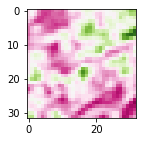

In [13]:
plt.figure(figsize=(2, 2))
plt.imshow(imgs[940], cmap='PiYG')

In [14]:
imgs[940].shape

(32, 32)